---
format: 
  html:
    toc: true
    # page-layout: full
execute:
  echo: true
---

# Comparing Indices: CDC's SVI and HVRI's SoVI

# Comparing the CDC’s Social Vulnerability Index (SVI) and HVRI’s SoVI at County Level


Integrity Statement: I used github GPT copilot to validate the code for this notebook. I also used the code from the following sources:


- Sovi HVRI: https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/sovi_data/index.php
- CDC SVI: https://www.atsdr.cdc.gov/placeandhealth/svi/data_documentation_download.html
- Cenpy Geographic Data: https://cenpy-devs.github.io/cenpy/

## CDC SVI


In [4]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
svi = pd.read_excel('Assignment/SVI2016_US_COUNTY_Assignment.xlsx')
svi


,FID,ST,STATE,ST_ABBR,COUNTY,GEOID,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,0,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,22714,75,20800,391,6697,1037,1437,277,26168,1221,4528,445,7695,104,13853,34,10009,850,1516,267.0,13386,161.0,432,163.3,1034,329.9,4095,379,254,104.5,1024,242,490,163,12.3,1.9,5.6,1.1,26168,1221,12.4,1.2,14.0,0.2,25.2,0.1,18.4,1.6,7.3,1.3,24.3,0.3,0.8,0.3,4.6,1.5,18.0,1.7,1.2,0.5,4.9,1.1,0.9,0.3,0.2824,0.3298,0.3607,0.4744,1.4473,NaN,0.1964,0.8313,0.7380,0.3200,2.0856,NaN,0.6339,0.5355,1.1694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4852,649,8.9,1.2,40854
1,1341,1,ALABAMA,AL,Baldwin,1003,"Baldwin County, Alabama",1589.807425,199510,0,107579,202,75149,1285,25551,1920,5887,674,28069,733,13956,974,37338,79,44270,0,27390,1430,4494,589.8,33560,245.0,1540,489.6,19711,936.9,12829,935,958,219.1,2303,342,2911,443,13.0,1.0,6.3,0.7,28069,733,10.0,0.7,18.7,0.1,22.2,0.0,13.9,0.7,6.0,0.8,16.8,0.1,0.8,0.3,18.3,0.9,11.9,0.9,1.3,0.3,3.1,0.5,1.5,0.2,0.3317,0.4241,0.2448,0.2999,1.3005,NaN,0.6437,0.4476,0.3521,0.1493,1.5928,NaN,0.5253,0.5282,1.0535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,23255,1817,11.8,0.9,197683
2,3074,1,ALABAMA,AL,Barbour,1005,"Barbour County, Alabama",884.875776,26614,0,11802,101,9122,286,6235,636,1323,267,17249,822,4824,362,4399,29,5735,19,5086,397,1132,160.1,14402,154.0,382,153.7,179,90.4,3534,215,158,62.2,889,145,2932,244,26.4,2.7,12.8,2.6,17249,822,26.2,1.9,16.5,0.1,21.5,0.1,21.5,1.7,12.4,1.7,54.1,0.6,1.5,0.6,1.5,0.8,29.9,1.8,1.7,0.7,9.7,1.5,11.0,0.9,0.9261,0.9526,0.9491,0.9551,3.7829,NaN,0.4174,0.3617,0.8937,0.9296,2.6024,NaN,0.9042,0.6979,1.6020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,4,0,0,0,1,1,1,0,1,0,1,0,0,1,2,8,3079,385,13.0,1.6,27321
3,2113,1,ALABAMA,AL,Bibb,1007,"Bibb County, Alabama",622.582355,22572,0,8972,76,7048,352,3390,818,643,207,18988,1773,3040,374,3360,111,4756,44,3039,367,516,202.8,5696,21.0,96,106.7,195,86.6,2549,261,22,22.8,443,136,2001,190,16.5,4.0,7.1,2.3,18988,1773,19.3,2.3,14.9,0.5,21.1,0.2,14.8,1.8,7.3,2.9,25.2,0.1,0.4,0.5,2.2,1.0,28.4,3.0,0.3,0.3,6.3,1.9,8.9,0.8,0.5536,0.5425,0.8819,0.7781,2.7561,NaN,0.2585,0.3088,0.4419,0.3266,1.3359,NaN,0.6450,0.3553,1.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,1859,400,9.0,1.9,18756
4,1,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,23850,59,20619,403,9441,963,1367,284,21033,689,7882,645,9921,123,13601,29,8538,663,1614,301.0,7122,147.0,1018,248.1,190,85.8,5467,429,391,130.6,816,198,552,131,16.5,1.7,6.0,1.2,21033,689,20.0,1.6,17.2,0.2,23.6,0.1,14.9,1.2,7.8,1.5,12.3,0.3,1.9,0.5,0.8,0.4,22.9,1.8,1.9,0.6,4.0,1.0,1.0,0.2,0.5536,0.3792,0.7504,0.8058,2.4890,NaN,0.4909,0.6466,0.4527,0.4018,1.9920,NaN,0.4238,0.7482,1.1719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6388,740,11.2,1.3,42597
...,...,...,...,...,...,...,...,...,...,...,...,..

In [11]:
svi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Columns: 124 entries, FID to E_DAYPOP
dtypes: float64(61), int64(59), object(4)
memory usage: 3.0+ MB


In [12]:
svi.isnull().sum()

FID           0
ST            0
STATE         0
ST_ABBR       0
COUNTY        0
             ..
E_UNINSUR     0
M_UNINSUR     0
EP_UNINSUR    0
MP_UNINSUR    0
E_DAYPOP      0
Length: 124, dtype: int64

In [13]:
svi.EP_MUNIT.describe()

count    3142.000000
mean        4.612412
std         5.578143
min         0.000000
25%         1.400000
50%         2.900000
75%         5.700000
max        89.600000
Name: EP_MUNIT, dtype: float64

# Question 1

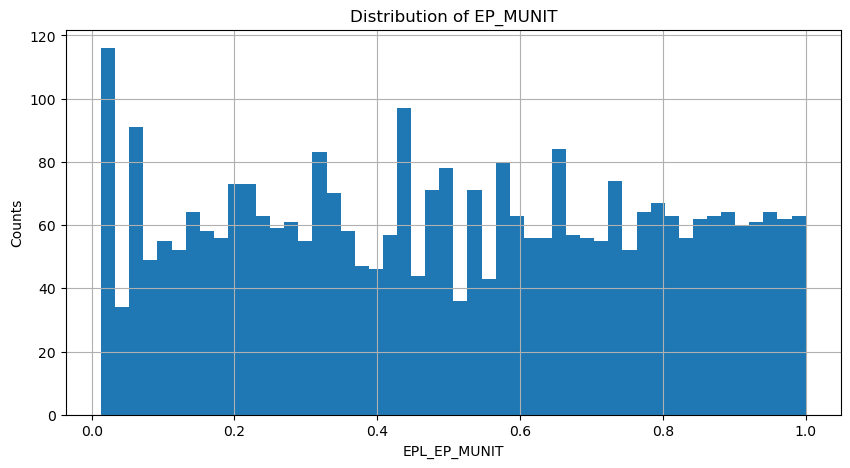

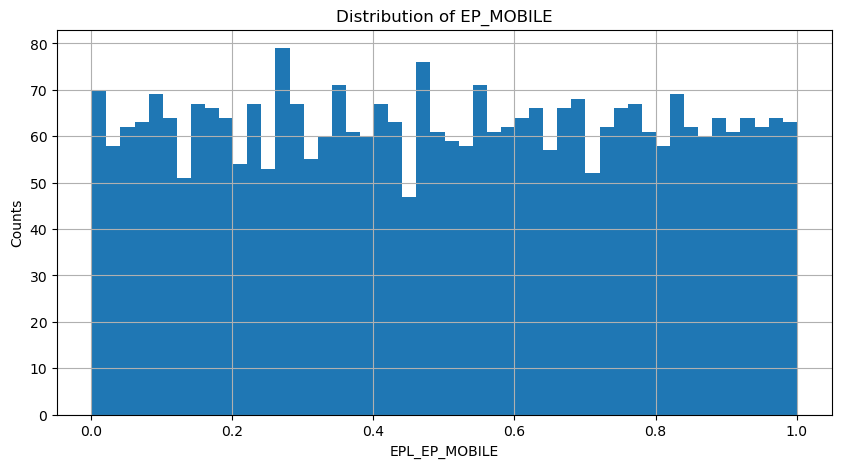

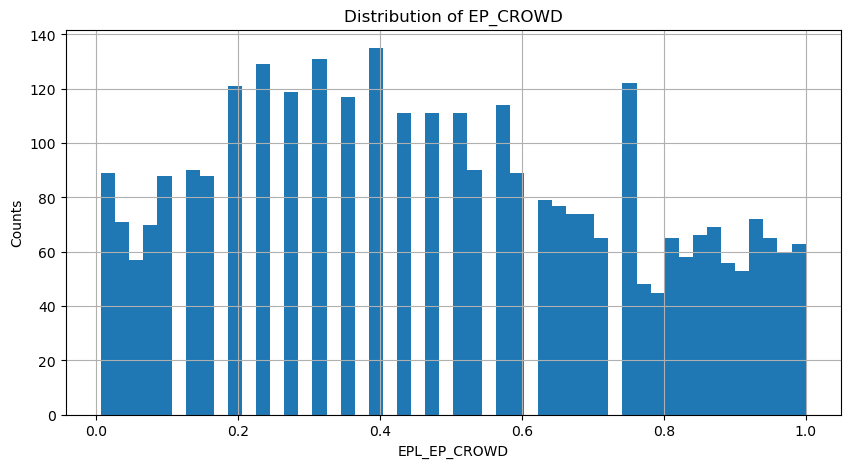

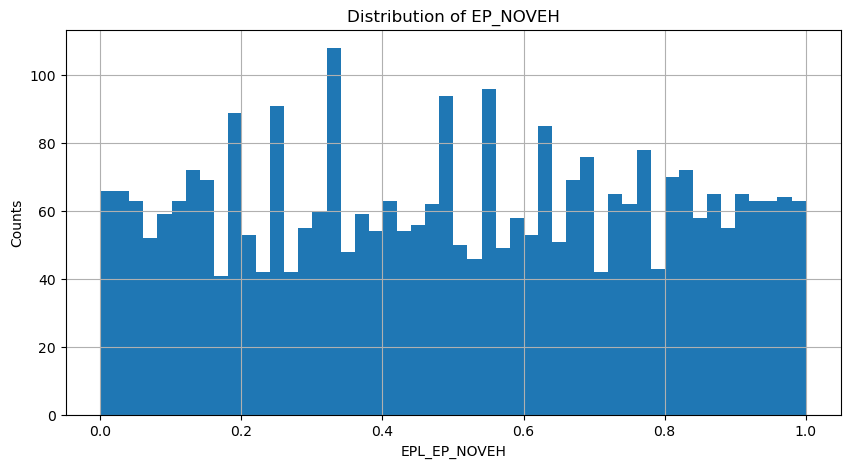

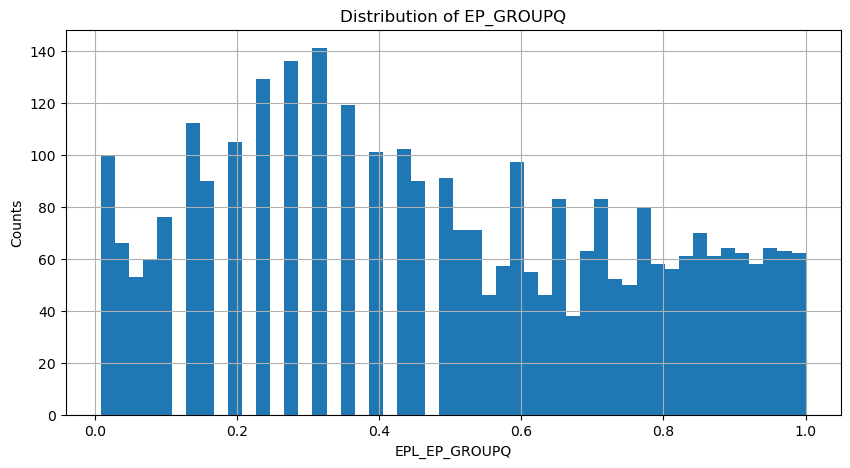

In [21]:
variables = ['EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ']
for var in variables:
    percentile_column = 'EPL_' + var
    svi[percentile_column] = svi[var].rank(pct=True)

for var in variables:
    percentile_column = 'EPL_' + var
    svi[percentile_column].hist(bins=50, figsize=(10,5))
    plt.title('Distribution of ' + var)
    plt.ylabel('Counts')
    plt.xlabel(percentile_column)
    plt.show()

**pygris** is a Python package to help users access US Census Bureau TIGER/Line and cartographic boundary shapefiles and load them into Python as GeoDataFrames. The goal of the package is to make it simple to access US Census geographic data; data can be acquired with a single function for a given geography (e.g. tracts() for Census tracts) along with a few options.



Text(0.5, 1.0, 'Cartographic')

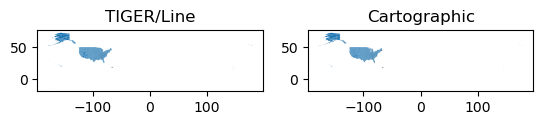

In [58]:
from pygris import counties

# Get the default TIGER/Line file for counties
us_counties = counties( cache = True, year=2016)

# Get the cartographic boundary file with cb = True
us_cartographic = counties(cb = True, cache = True, year=2016)

# Plot the two side-by-side to compare them
fig, ax = plt.subplots(ncols = 2)
us_counties.plot(ax = ax[0])
us_cartographic.plot(ax = ax[1])

ax[0].set_title("TIGER/Line")
ax[1].set_title("Cartographic")

<Axes: >

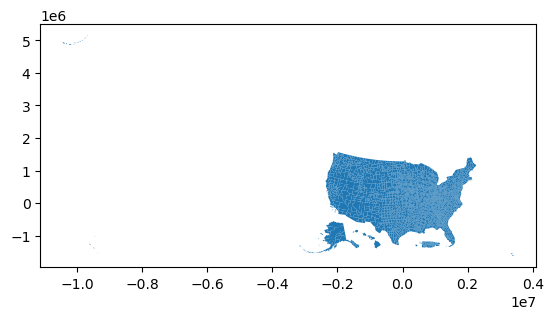

In [79]:
from pygris.utils import shift_geometry

us_rescaled = shift_geometry(us_counties)

us_rescaled.plot()

In [60]:
us_rescaled.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477895811,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016761713,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169240199,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [64]:
svi.head()

,FID,ST,STATE,ST_ABBR,COUNTY,GEOID,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Percentile_EP_MUNIT,Percentile_EP_MOBILE,Percentile_EP_CROWD,Percentile_EP_NOVEH,Percentile_EP_GROUPQ,EPL_EP_MUNIT,EPL_EP_MOBILE,EPL_EP_CROWD,EPL_EP_NOVEH,EPL_EP_GROUPQ
0,0,1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,22714,75,20800,391,6697,1037,1437,277,26168,1221,4528,445,7695,104,13853,34,10009,850,1516,267.0,13386,161.0,432,163.3,1034,329.9,4095,379,254,104.5,1024,242,490,163,12.3,1.9,5.6,1.1,26168,1221,12.4,1.2,14.0,0.2,25.2,0.1,18.4,1.6,7.3,1.3,24.3,0.3,0.8,0.3,4.6,1.5,18.0,1.7,1.2,0.5,4.9,1.1,0.9,0.3,0.2824,0.3298,0.3607,0.4744,1.4473,NaN,0.1964,0.8313,0.7380,0.3200,2.0856,NaN,0.6339,0.5355,1.1694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4852,649,8.9,1.2,40854,0.682527,0.728358,0.235201,0.338638,0.130968,0.682527,0.728358,0.235201,0.338638,0.130968
1,1341,1,ALABAMA,AL,Baldwin,1003,"Baldwin County, Alabama",1589.807425,199510,0,107579,202,75149,1285,25551,1920,5887,674,28069,733,13956,974,37338,79,44270,0,27390,1430,4494,589.8,33560,245.0,1540,489.6,19711,936.9,12829,935,958,219.1,2303,342,2911,443,13.0,1.0,6.3,0.7,28069,733,10.0,0.7,18.7,0.1,22.2,0.0,13.9,0.7,6.0,0.8,16.8,0.1,0.8,0.3,18.3,0.9,11.9,0.9,1.3,0.3,3.1,0.5,1.5,0.2,0.3317,0.4241,0.2448,0.2999,1.3005,NaN,0.6437,0.4476,0.3521,0.1493,1.5928,NaN,0.5253,0.5282,1.0535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,23255,1817,11.8,0.9,197683,0.973106,0.541057,0.274666,0.092457,0.359007,0.973106,0.541057,0.274666,0.092457,0.359007
2,3074,1,ALABAMA,AL,Barbour,1005,"Barbour County, Alabama",884.875776,26614,0,11802,101,9122,286,6235,636,1323,267,17249,822,4824,362,4399,29,5735,19,5086,397,1132,160.1,14402,154.0,382,153.7,179,90.4,3534,215,158,62.2,889,145,2932,244,26.4,2.7,12.8,2.6,17249,822,26.2,1.9,16.5,0.1,21.5,0.1,21.5,1.7,12.4,1.7,54.1,0.6,1.5,0.6,1.5,0.8,29.9,1.8,1.7,0.7,9.7,1.5,11.0,0.9,0.9261,0.9526,0.9491,0.9551,3.7829,NaN,0.4174,0.3617,0.8937,0.9296,2.6024,NaN,0.9042,0.6979,1.6020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,4,0,0,0,1,1,1,0,1,0,1,0,0,1,2,8,3079,385,13.0,1.6,27321,0.278167,0.937619,0.433164,0.883036,0.942553,0.278167,0.937619,0.433164,0.883036,0.942553
3,2113,1,ALABAMA,AL,Bibb,1007,"Bibb County, Alabama",622.582355,22572,0,8972,76,7048,352,3390,818,643,207,18988,1773,3040,374,3360,111,4756,44,3039,367,516,202.8,5696,21.0,96,106.7,195,86.6,2549,261,22,22.8,443,136,2001,190,16.5,4.0,7.1,2.3,18988,1773,19.3,2.3,14.9,0.5,21.1,0.2,14.8,1.8,7.3,2.9,25.2,0.1,0.4,0.5,2.2,1.0,28.4,3.0,0.3,0.3,6.3,1.9,8.9,0.8,0.5536,0.5425,0.8819,0.7781,2.7561,NaN,0.2585,0.3088,0.4419,0.3266,1.3359,NaN,0.6450,0.3553,1.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,1859,400,9.0,1.9,18756,0.411203,0.925366,0.025143,0.572247,0.916454,0.411203,0.925366,0.025143,0.572247,0.916454
4,1,1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,23850,59,2061

In [71]:
svi['GEOID'] = svi['GEOID'].astype(str).str.zfill(5)
us_rescaled['GEOID'] = us_rescaled['GEOID'].astype(str).str.zfill(5)


<Axes: >

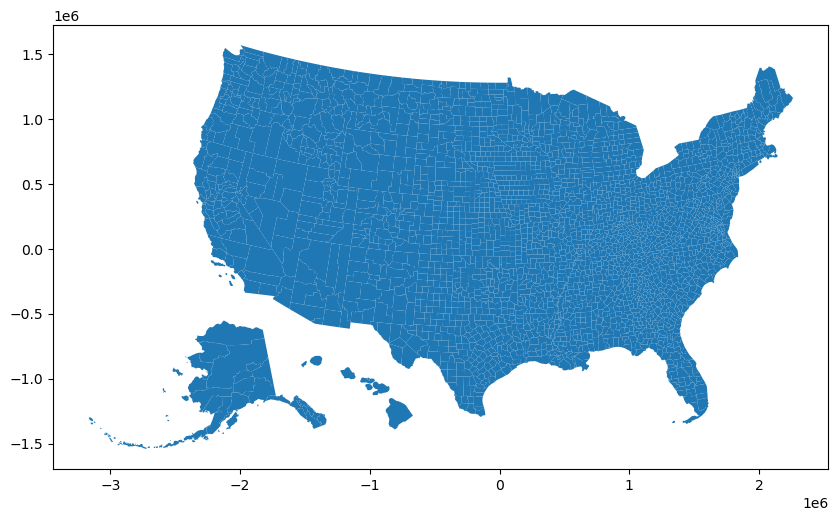

In [81]:
svi_geo= svi.merge(us_rescaled[['GEOID', 'NAMELSAD', 'geometry']], left_on='GEOID', right_on='GEOID')
svi_geo= gpd.GeoDataFrame(svi_geo, crs=us_rescaled.crs)
svi_geo.plot(figsize=(10,10))

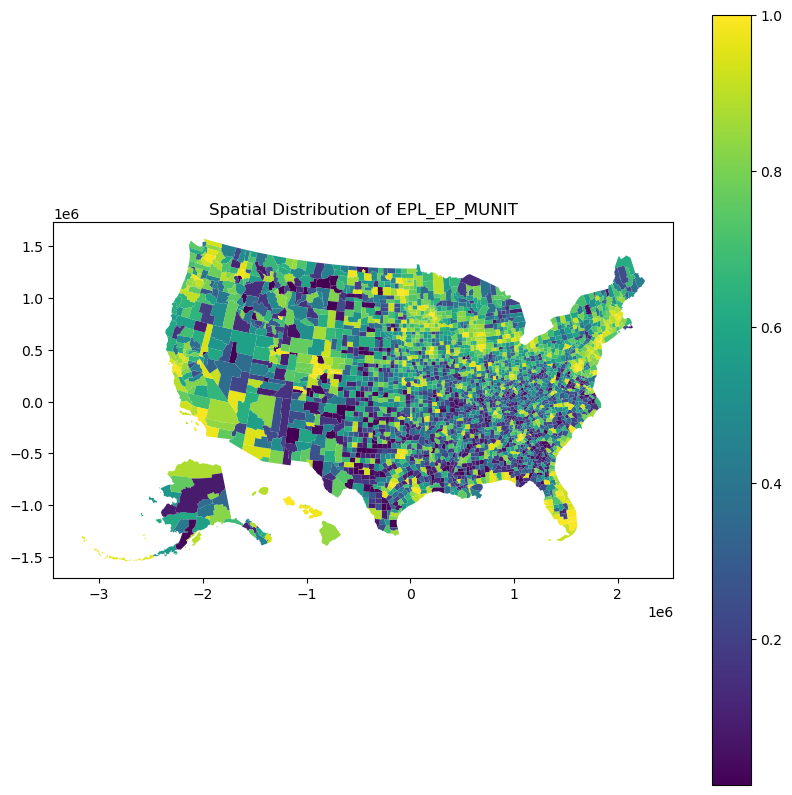

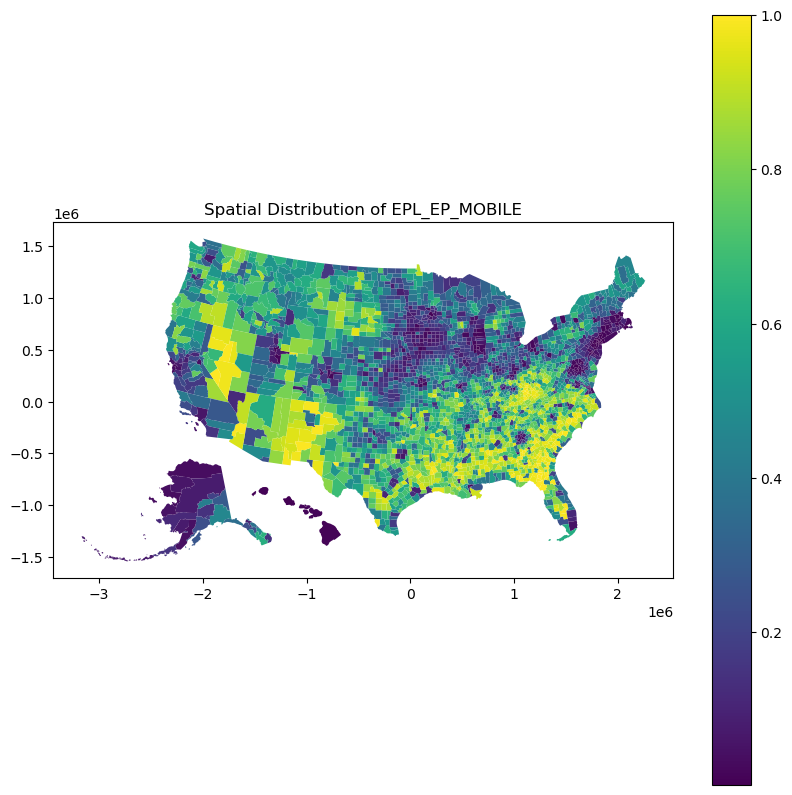

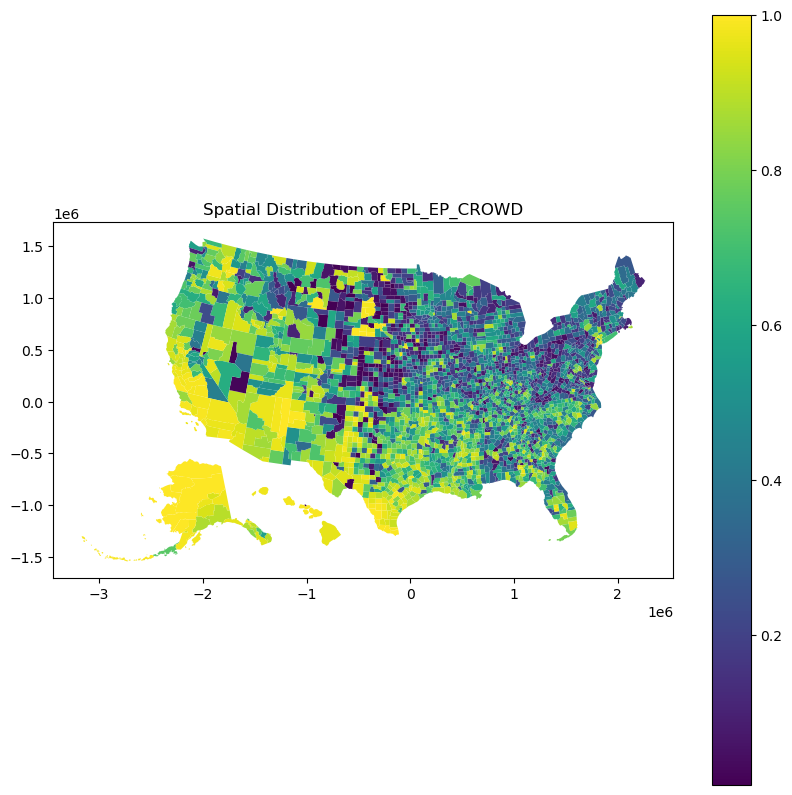

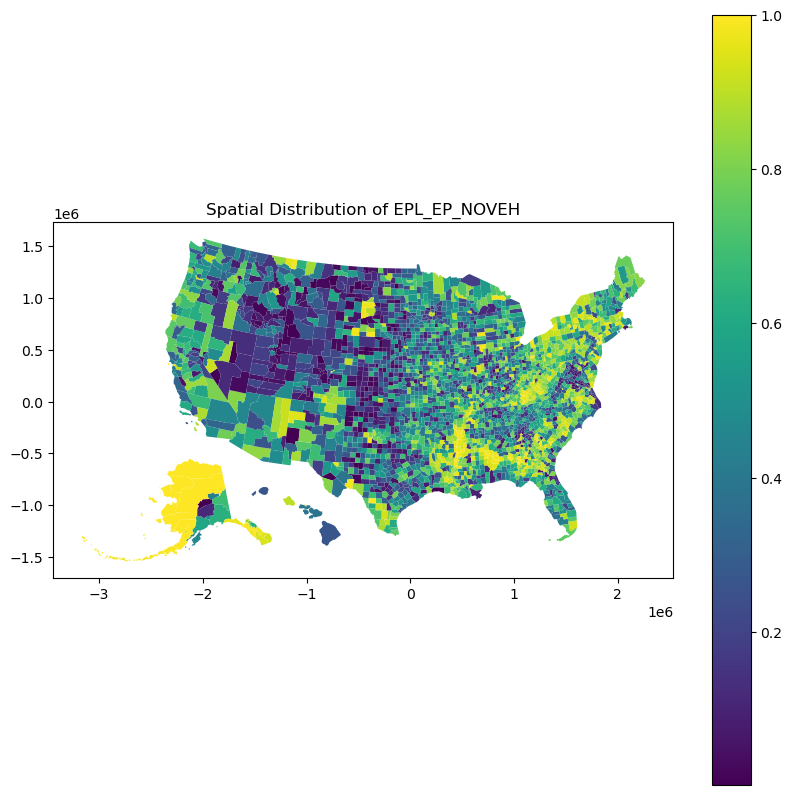

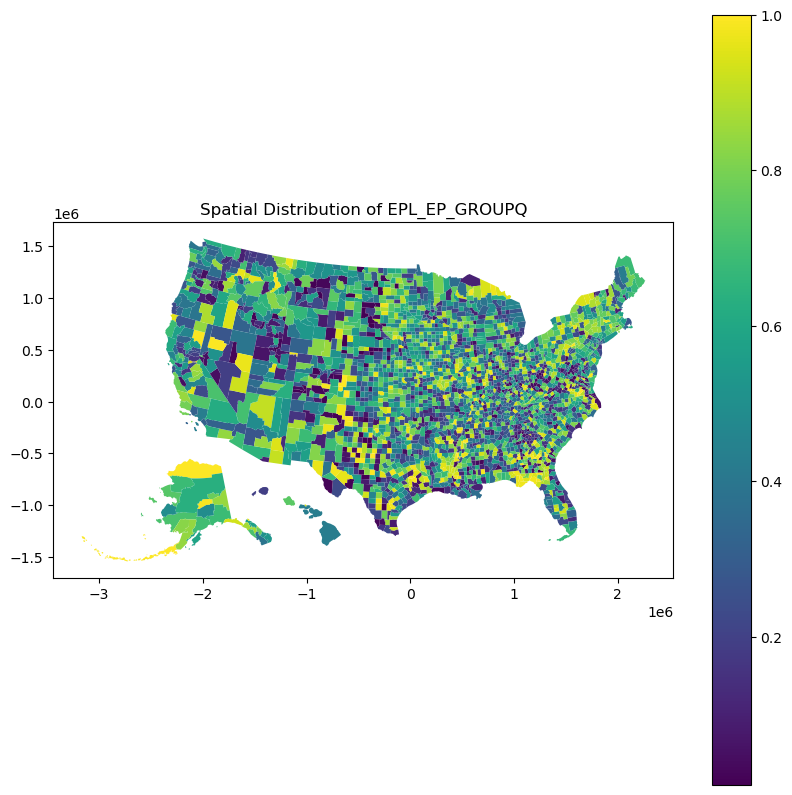

In [85]:
percentile_columns=['EPL_EP_MUNIT', 'EPL_EP_MOBILE', 'EPL_EP_CROWD', 'EPL_EP_NOVEH', 'EPL_EP_GROUPQ']
for var in percentile_columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    svi_geo.plot(column=var, ax=ax, legend=True, cmap='viridis')
    ax.set_title("Spatial Distribution of " + var)
    plt.show()

# Question 2: The Housing and Transportation (HT) Index 

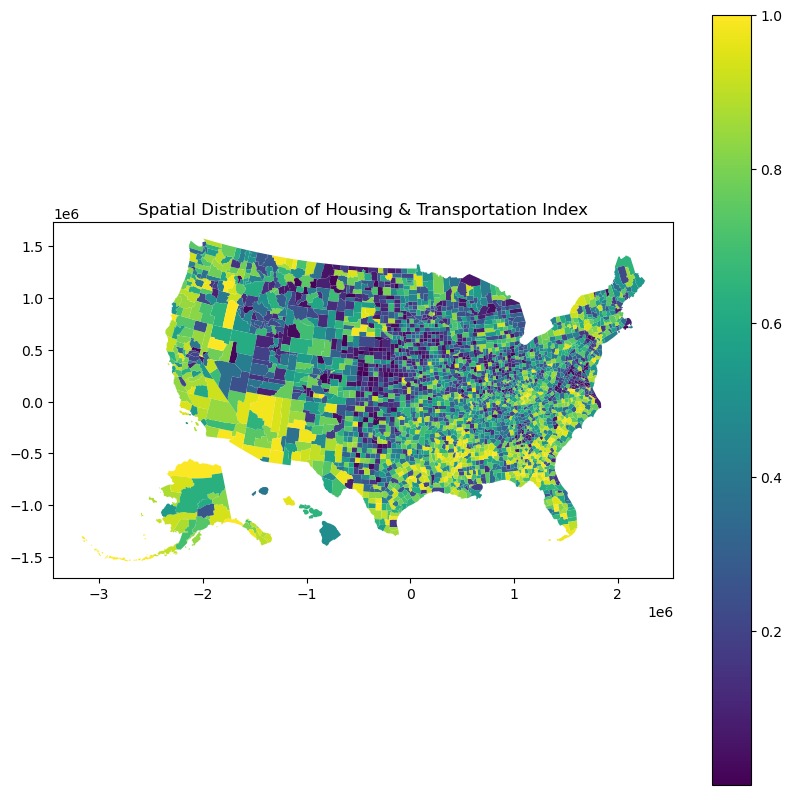

In [86]:
# Sum the calculated percentile ranks to get the Housing & Transportation index
svi_geo['SPL_THEME4'] = svi_geo[['EPL_EP_MUNIT', 'EPL_EP_MOBILE', 'EPL_EP_CROWD', 'EPL_EP_NOVEH', 'EPL_EP_GROUPQ']].sum(axis=1)

# Calculate percentile rank for SPL_THEME4
svi_geo['RPL_THEME4'] = svi_geo['SPL_THEME4'].rank(pct=True)

# Check the updated dataframe
svi_geo.plot(column='RPL_THEME4', legend=True, figsize=(10, 10))
plt.title('Spatial Distribution of Housing & Transportation Index')
plt.show()

## Total Combined SVI Values

In [93]:
svi_geo.columns[svi_geo.columns.str.contains('THEME')]


Index(['SPL_THEME1', 'RPL_THEME1', 'SPL_THEME2', 'RPL_THEME2', 'SPL_THEME3',
       'RPL_THEME3', 'SPL_THEME4', 'RPL_THEME4', 'SPL_THEMES', 'RPL_THEMES',
       'F_THEME1', 'F_THEME2', 'F_THEME3', 'F_THEME4'],
      dtype='object')

In [94]:
svi_geo['SPL_THEME1']

0       1.4473
1       1.3005
2       3.7829
3       2.7561
4       2.4890
         ...  
3137    0.8373
3138    0.1070
3139    1.7383
3140    1.8539
3141    0.9255
Name: SPL_THEME1, Length: 3142, dtype: float64

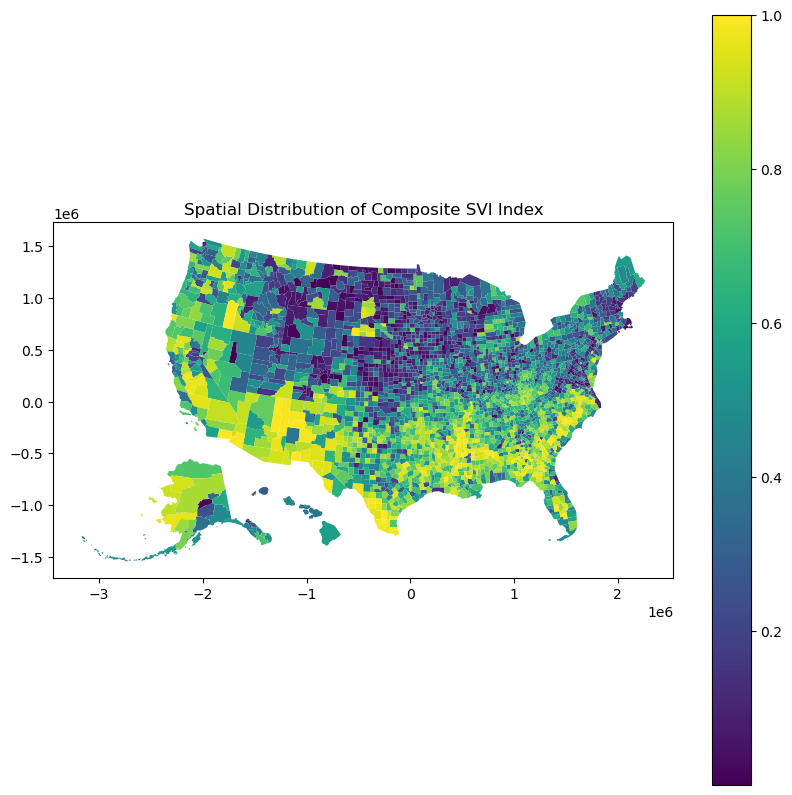

In [107]:
svi_geo['Composite_Index'] = svi_geo[['SPL_THEME1', 'SPL_THEME2', 'SPL_THEME3', 'SPL_THEME4']].sum(axis=1)

svi_geo['RPL_THEMES'] = svi_geo['Composite_Index'].rank(pct=True)

svi_geo.plot(column='RPL_THEMES', legend=True, figsize=(10, 10))
plt.title('Spatial Distribution of Composite SVI Index')
plt.show()


## SOVI by HVRI

I am using [SoVI 2019 US County Data](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/sovi_data/index.php) to compare with CDC's SVI.

In [96]:
sovi= pd.read_excel('sovi2019_countyus.xlsx')
sovi.head()

,No,GeoID,GeoID_A,Name,State,SoVI2019US
0,1,0500000US01001,0500000US01001,"Autauga County, Alabama",Alabama,-3.163005
1,2,0500000US01003,0500000US01003,"Baldwin County, Alabama",Alabama,-1.704175
2,3,0500000US01005,0500000US01005,"Barbour County, Alabama",Alabama,2.310552
3,4,0500000US01007,0500000US01007,"Bibb County, Alabama",Alabama,-0.540243
4,5,0500000US01009,0500000US01009,"Blount County, Alabama",Alabama,-2.473869


In [98]:
sovi['GOEID'] = sovi['GeoID'].str[-5:].astype(str)
sovi['GOEID']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3137    56037
3138    56039
3139    56041
3140    56043
3141    56045
Name: GOEID, Length: 3142, dtype: object

Text(0.5, 1.0, 'Spatial Distribution of SOVI Index')

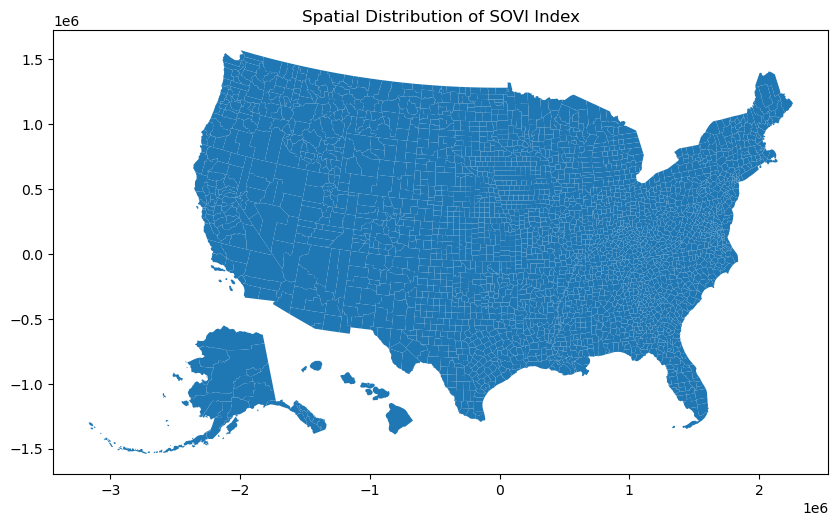

In [99]:
sovi_geo= sovi.merge(us_rescaled[['GEOID', 'NAMELSAD', 'geometry']], left_on='GOEID', right_on='GEOID')
sovi_geo= gpd.GeoDataFrame(sovi_geo, crs=us_rescaled.crs)


Text(0.5, 1.0, 'Spatial Distribution of SOVI Index')

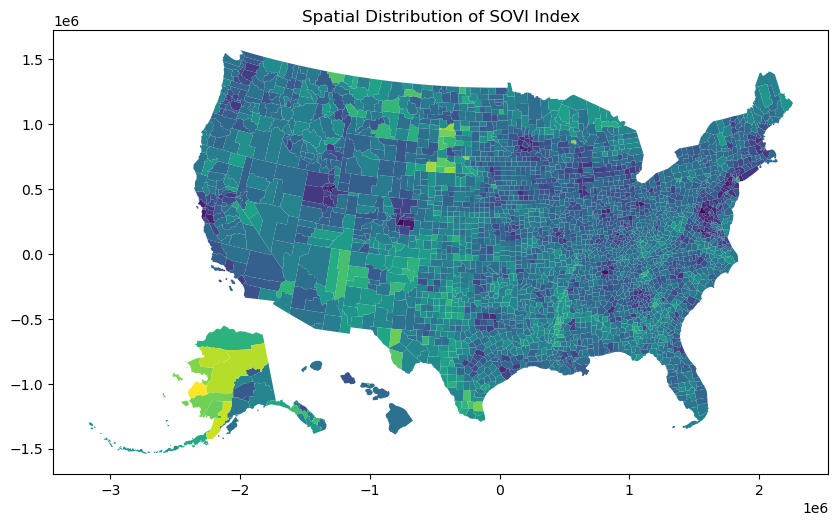

In [100]:
sovi_geo.plot(column='SoVI2019US',figsize=(10,10))
plt.title('Spatial Distribution of SOVI Index')

# Question 3

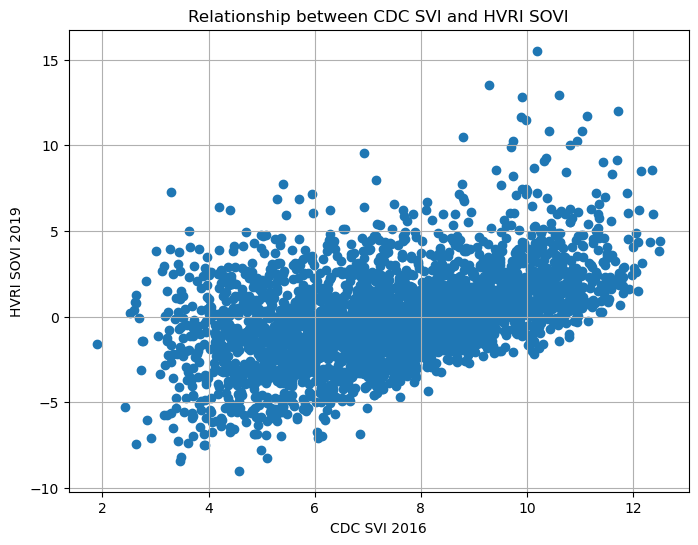

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(svi_geo['Composite_Index'], sovi_geo['SoVI2019US'])
plt.title('Relationship between CDC SVI and HVRI SOVI')
plt.xlabel('CDC SVI 2016')
plt.ylabel('HVRI SOVI 2019')
plt.grid(True)
plt.show()


In [105]:
import scipy.stats

pearson_coef, p_value = scipy.stats.pearsonr(svi_geo['Composite_Index'], sovi_geo['SoVI2019US'])

print(f"Pearson Correlation Coefficient: {pearson_coef}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.46714364857700585
P-value: 4.202118302438132e-170


Here we have a coeeficient of correlation of 0.467, indicating a positive correlation between the two indices. The number is statistically significant given that p-value is far less than 0.05.

Therefore we can safely say that the two indices are positively correlated. But one disclaimer is that the two indices are from two different years, 2016 and 2019. So, the correlation might be different if we use the same year data.


# Question 4: CDC SVI and HVRI SOVI 

<Axes: >

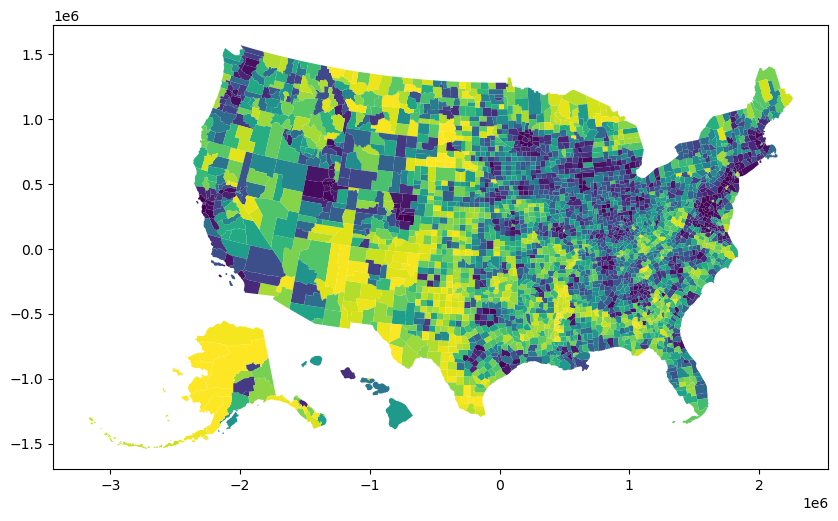

In [106]:
sovi_geo['SOVI_PctRank']= sovi_geo['SoVI2019US'].rank(pct=True)
sovi_geo.plot(column='SOVI_PctRank', figsize=(10,10))

<Axes: >

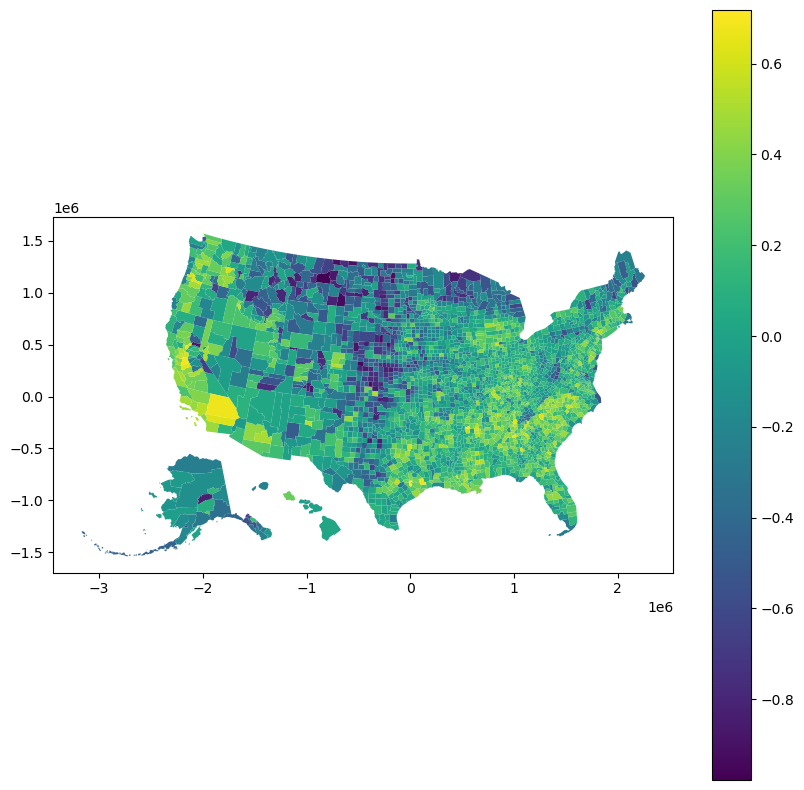

In [110]:
svi_geo['difference'] = svi_geo['RPL_THEMES'] - sovi_geo['SOVI_PctRank']
svi_geo.plot(column='difference', figsize=(10,10), legend=True, cmap='viridis')

In [1]:
# svi_geo.explore(column='difference', cmap='viridis', legend=True, figsize=(10,10))

The counties colored in yellow represent areas where the SVI is significantly higher than the SOVI. This suggests that according to the CDC's SVI, these counties are more vulnerable compared to their ranking in the HVRI's SOVI. Whereas the counties that appear in purple show where the SOVI is higher than the SVI. In these areas, the HVRI's assessment of vulnerability is higher than the CDC's.

If certain regions of the country are predominantly one color, it suggests regional trends in how the two indices diverge. For example, the West Coast is mostly yellow, it would mean that the CDC's index rates the West Coast as more vulnerable than the HVRI's index does.